This notebook uses auto-regression techniques to study the behavior in the calibration value.

In [1]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker
#now lets try some autoregression
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from sklearn.preprocessing import MinMaxScaler

In [2]:
test = pd.read_csv('/home/rusack/evans908/FAIR/scripts/slimmed_df_LME38_PNA4.csv', index_col=0)


/panfs/roc/msisoft/anaconda/python3-2020.07-mamba/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
test[['calibration']]

,calibration
54000,0.937300
54000,0.937845
54000,0.936282
54000,0.936760
54000,0.937384
...,...
60849,0.864693
60849,0.875739
60849,0.874596
60849,NaN


In [4]:
def digest(grp):
    slimmed = grp[1][['calibration','laser_datetime']]
    return (grp[0], slimmed.set_index('laser_datetime'))

In [5]:
grps = [digest(grp) for grp in test.groupby(test.index)]

In [18]:
multi_df = grps[0][1].copy()
for grp in grps:
    multi_df[grp[0]] = grp[1].calibration
multi_df_clean = multi_df.drop('calibration',axis=1)

In [23]:
corr = multi_df_clean.corr()

In [27]:
corr.min().min()

0.9701777446697004

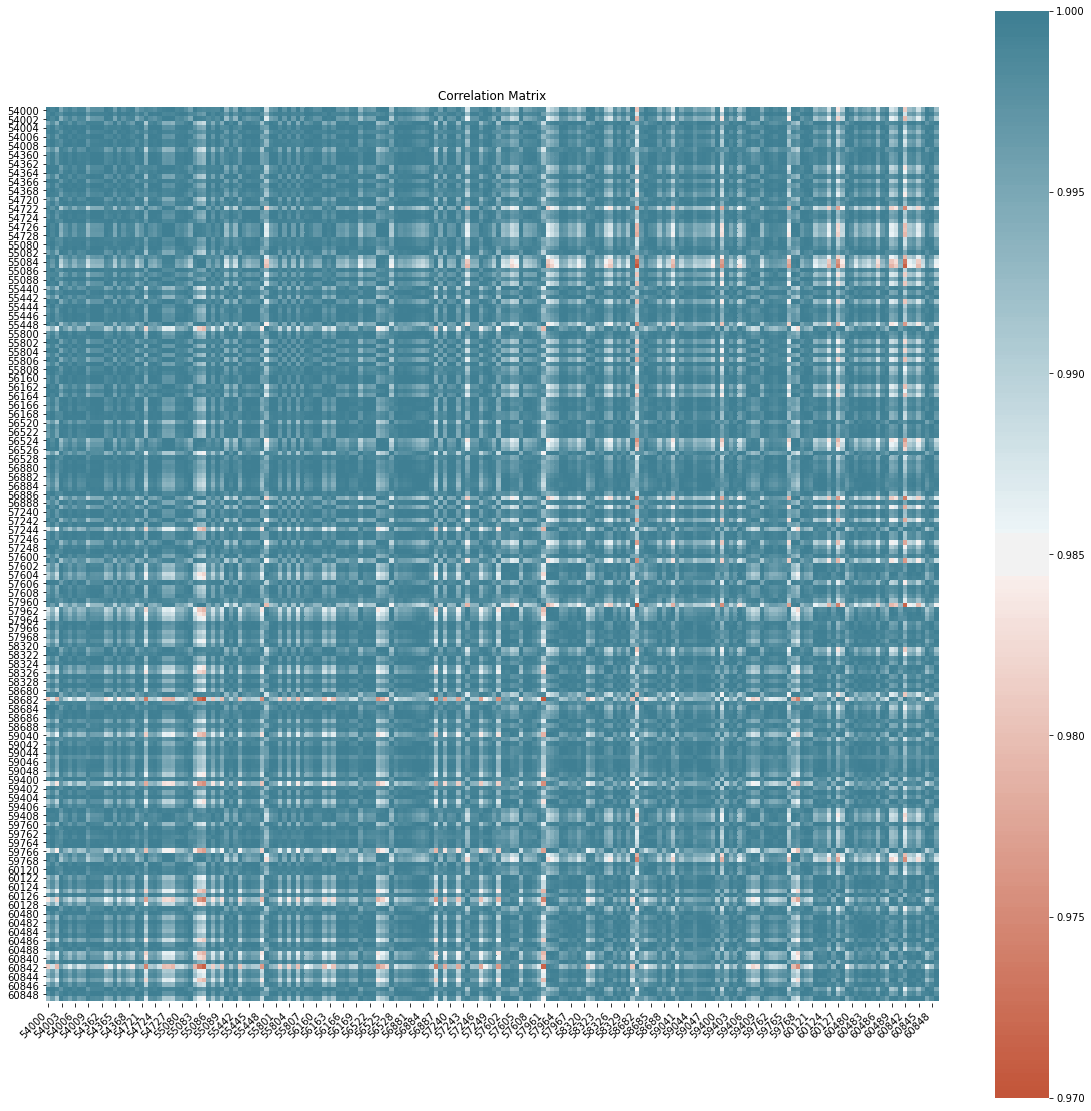

In [31]:
fig, ax = plt.subplots(figsize=(20,20))

ax.set_title('Correlation Matrix')
corr1 = multi_df_clean.corr()
ax = sns.heatmap(
    corr1, 
    vmin=0.97, vmax=1, center=0.985,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#fix for matplotlib 3.1.1 issue (fixed in 3.1.2??)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [7]:
corr1

,54000,54001,54002,54003,54004,54005,54006,54007,54008,54009
54000,1.000000,0.741100,0.932804,0.610446,0.536512,0.758128,0.914454,0.714195,0.855896,0.865784
54001,0.741100,1.000000,0.796769,0.770474,0.734416,0.769670,0.771795,0.731417,0.705362,0.828510
54002,0.932804,0.796769,1.000000,0.634905,0.571382,0.737736,0.912109,0.719538,0.826856,0.894826
54003,0.610446,0.770474,0.634905,1.000000,0.788959,0.677417,0.659645,0.729968,0.635369,0.716364
54004,0.536512,0.734416,0.571382,0.788959,1.000000,0.710072,0.632195,0.703358,0.586643,0.672983
54005,0.758128,0.769670,0.737736,0.677417,0.710072,1.000000,0.811427,0.729505,0.800895,0.782559
54006,0.914454,0.771795,0.912109,0.659645,0.632195,0.811427,1.000000,0.754356,0.859820,0.881427
54007,0.714195,0.731417,0.719538,0.729968,0.703358,0.729505,0.754356,1.000000,0.706634,0.740525
54008,0.855896,0.705362,0.826856,0.635369,0.586643,0.800895,0.859820,0.706634,1.000000,0.837800
54009,0.865784,0.828510,0.894826,0.716364,0.672983,0.782559,0.881427,0.740525,0.837800,1.000000


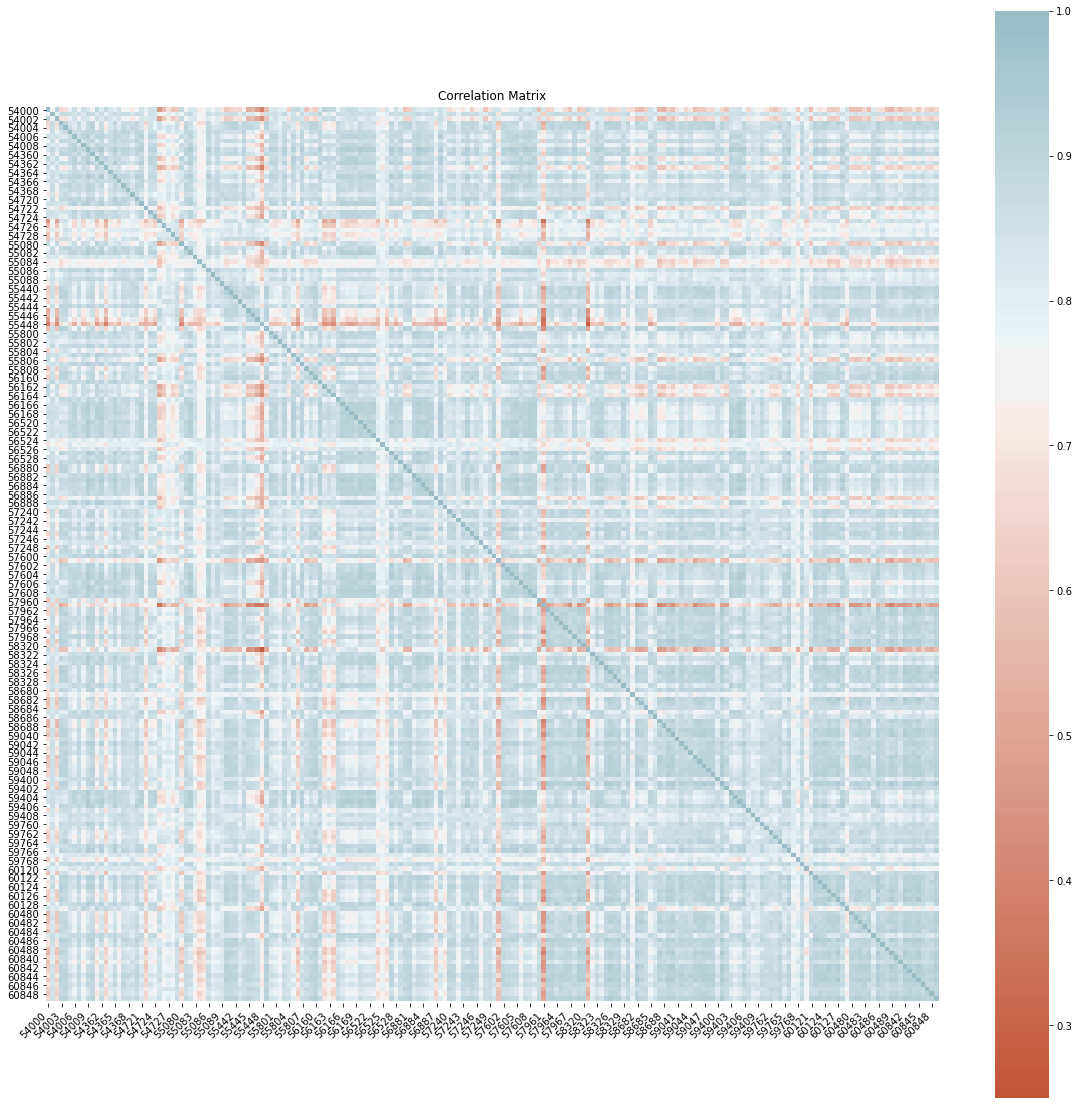

In [36]:
xtals_df = multi_df_clean
fig, ax = plt.subplots(figsize=(20,20))

ax.set_title('Correlation Matrix')
corr2 = xtals_df[(xtals_df.index > '2018-11-13 00:00:00') & (xtals_df.index < '2018-11-17 00:00:00')].corr()


ax = sns.heatmap(
    corr2, 
    vmin=0.25, vmax=1, center=0.75,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#fix for matplotlib 3.1.1 issue (fixed in 3.1.2??)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [34]:
corr2.min().min()

0.27322165256756886